<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_3_%D0%9E_%D0%B2%D0%BA%D1%83%D1%81%D0%BD%D0%BE%D0%B9_%D0%B8_%D0%B7%D0%B4%D0%BE%D1%80%D0%BE%D0%B2%D0%BE%D0%B9_%D0%BF%D0%B8%D1%89%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Проект 3. О вкусной и здоровой пище

#Ответы на вопросы заданий

In [1]:
import pandas as pd
import numpy as np

RANDOM_SEED = 36

# rest.loc[0:100, 'reviews'].to_list()
path = 'https://raw.githubusercontent.com/akitim/datasets/main/main_task_new.csv'
rest = pd.read_csv(path)

rest.drop(['URL_TA', 'ID_TA'], axis=1, inplace=True)
rest.columns = ['id', 'city', 'cuisine', 'ranking', 'rating', 'price_range', 'rev_number', 'reviews']

# 2.1 Задание 1
# Какие столбцы НЕ содержат пропущенных (None) значений?
# rest.info()
 
print('\nЕсть пропуски в столбцах:\n',
*list(rest.loc[:, rest.apply(pd.isna).any(axis=0)].columns))
 
print('\nНет пропусков в столбцах:\n',
*list(rest.loc[:, ~rest.apply(pd.isna).any(axis=0)].columns), '\n')
 
# 2.2 Задание 2
#rest.loc[0, :].apply(type) != str
 
# 2.3 Задание 3
#Приведение 'кухни' к списку
#rest.loc[0, 'Cuisine Style'].split(', ')
#[s.replace('[', '').replace(']', '').replace("'", "") for s in rest.loc[0, 'Cuisine Style'].s изplit(', ')]

# 4.1 Вопросы о ценах
rest.loc[:, 'price_range'].dropna().unique()
rest.loc[rest.loc[:, 'price_range'] == '$$ - $$$', 'price_range'].count()

# 4.2 Вопрос о городах
len(rest.loc[:, 'city'].unique())

# 4.3 Вопросы о кухнях
rest.loc[:, 'cuisine'] =\
rest.loc[:, 'cuisine'].fillna(value='[]').apply(
    lambda cuisine_list_for_id: \
    [s.replace("'", "") for s in cuisine_list_for_id[2:-2].split(', ')]
)

cuisine_list = []
for cuisine in rest.loc[:, 'cuisine']:
    cuisine_list += cuisine
cuisines_total = len(set(cuisine_list).difference(set([''])))
# cuisines_total = len(set(cuisine_list)) - 1

from collections import Counter
Counter(cuisine_list).most_common(1)[0][0]

round(
    rest.loc[:, 'cuisine'].apply(lambda x: len(x) if x != [] else 1).mean(),
    1
)

# 4.4 Вопросы об отзывах
import re
from datetime import datetime as dat

def rev_dates(s):
    date_regex = re.compile(r'(\d+/\d+/\d+)') # компилируем регулярку для поиска дат в формате dd/mm/YYYY
    str_date_ls = date_regex.findall(s)
    if str_date_ls != []:
        # str_date_ls = date_regex.findall(s)
        enum = list(enumerate(str_date_ls))
        f = ['%m/%d/%Y' if int(e[1][0:2].replace('/', '')) <= 12 else '%d/%m/%Y' for e in enum]
        return [dat.strptime(e[1], f[e[0]]) for e in enum] #dat.strptime(str_date_ls[0], f[0])
    else:
        return [dat(1970, 1, 1, 0, 0)] #strftime('%m/%d/%Y', '01/01/1970')

# когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
most_recent_rev_date =\
rest.loc[:, 'reviews'].apply(lambda s: rev_dates(s)[0]).max()
dat.strftime(most_recent_rev_date, '%Y-%m-%d') #->2018-02-26

# Какое максимальное количество дней отделяет даты публикации отзывов,
# размещённых на сайте ресторана? Введите количество дней в виде целого числа.
def last_rev_date_delta(dates):
    if len(dates) >= 3:
        return abs(dates[2] - dates[1]).days
    else:
        return abs(dates[0] - dates[-1]).days

# добавляем в данные столбец с кол-вом дней между двумя последними отзывами
rest.loc[:, 'delta'] =\
rest.loc[:, 'reviews'].apply(lambda s: last_rev_date_delta(rev_dates(s))) #.sort_values(ascending=False)
# rest['delta'].dt.days.astype(int).hist(log=True, bins=50);

#считаем кол-во кухонь в меню ресторана, добавляем соотв. столбец
rest.loc[:, 'n_of_cuisines'] = rest.loc[:, 'cuisine'].apply(lambda x: len(x) if x != [] else 1)
# rest.loc[:, 'n_of_cuisines'].hist(log=True, bins=50);

# добавляем столбец с населением города, в кот. находится ресторан
# rest.loc[:, 'city'].unique()
population = {
       'Paris': 2176, 'Stockholm': 1656, 'London': 10840, 'Berlin': 3664,
       'Munich': 1553, 'Oporto': 232, 'Milan': 3144, 'Bratislava': 433,
       'Vienna': 1911, 'Rome': 2860, 'Barcelona': 1620, 'Madrid': 3223,
       'Dublin': 555, 'Brussels': 1209, 'Zurich': 415, 'Warsaw': 1794,
       'Budapest': 1752, 'Copenhagen': 799, 'Amsterdam': 873, 'Lyon': 516,
       'Hamburg': 1899, 'Lisbon': 507, 'Prague': 1324, 'Oslo': 697, 
       'Helsinki': 658, 'Edinburgh': 488, 'Geneva': 202, 'Ljubljana': 296,
       'Athens': 664, 'Luxembourg': 125, 'Krakow': 781}
rest.loc[:, 'population'] = rest.loc[:, 'city'].apply(lambda city: population[city])

# добавляем столбец с подушевым ВВП по ППС города, в кот. нах. ресторан
is_capital = {'Paris': 1, 'Stockholm': 1, 'London': 1, 'Berlin': 1,
       'Munich': 0, 'Oporto': 0, 'Milan': 0, 'Bratislava': 1,
       'Vienna': 1, 'Rome': 1, 'Barcelona': 0, 'Madrid': 1,
       'Dublin': 1, 'Brussels': 1, 'Zurich': 0, 'Warsaw': 1,
       'Budapest': 1, 'Copenhagen': 1, 'Amsterdam': 1, 'Lyon': 0,
       'Hamburg': 0, 'Lisbon': 1, 'Prague': 1, 'Oslo': 1, 
       'Helsinki': 1, 'Edinburgh': 0, 'Geneva': 0, 'Ljubljana': 1,
       'Athens': 1, 'Luxembourg': 1, 'Krakow': 0
}
rest.loc[:, 'is_capital'] = rest.loc[:, 'city'].apply(lambda city: is_capital[city])

# добавляем столбец с подушевым ВВП по ППС города, в кот. нах. ресторан
gdp = {
    'Paris': 61883, 'Stockholm': 61754, 'London': 58827, 'Berlin': 37601,
    'Munich': 69844, 'Oporto': 24819, 'Milan': 51768, 'Bratislava': 67841,
    'Vienna': 46787, 'Rome': 41475, 'Barcelona': 45752, 'Madrid': 43074,
    'Dublin':30000, 'Brussels': 54634, 'Zurich': 64302, 'Warsaw': 49722,
    'Budapest': 37399, 'Copenhagen': 54197, 'Amsterdam': 60857, 'Lyon': 46913,
    'Hamburg': 52947, 'Lisbon': 34782, 'Prague': 48160, 'Oslo': 64673,
    'Helsinki': 49760, 'Edinburgh': 44059, 'Geneva': 62115, 'Ljubljana': 39763,
    'Athens': 32167, 'Luxembourg': 88312, 'Krakow': 29695
}
rest.loc[:, 'gdp'] =\
 rest.loc[:, 'city'].apply(lambda city: gdp[city])


#количество предприятий общепита в стране нахождения ресторана
n_of_food_serv = {
    'Paris': 161466, 'Stockholm': 23208, 'London': 88841, 'Berlin': 136091,
    'Munich': 136091, 'Oporto': 31363, 'Milan': 155875, 'Bratislava': 10917,
    'Vienna': 27348, 'Rome': 155875, 'Barcelona': 72657, 'Madrid': 72657,
    'Dublin': 7993, 'Brussels': 30773, 'Zurich': 11961, 'Warsaw': 39291,
    'Budapest': 16850, 'Copenhagen': 8983, 'Amsterdam': 30502, 'Lyon': 161466,
    'Hamburg': 136091, 'Lisbon': 31363, 'Prague': 45623, 'Oslo': 6605,
    'Helsinki': 7769, 'Edinburgh': 88841, 'Geneva': 11961, 'Ljubljana': 4369,
    'Athens': 39978, 'Luxembourg': 1475, 'Krakow': 39291
}
rest.loc[:, 'n_of_food_serv'] = rest.loc[:, 'city'].\
    apply(lambda city: n_of_food_serv[city])

#количество ресторанов в городе согласно датасету на душу населения города
n_of_rest = rest.loc[:, 'city'].value_counts()

rest.loc[:, 'n_of_rest'] = rest.loc[:, 'city'].\
    apply(lambda city: n_of_rest[city])

rest.loc[:, 'n_of_rest_per_capita'] = rest.loc[:, 'n_of_rest'] /\
    rest.loc[:, 'population']

# получаем dummies из столбца cuisine и прикрепляем его к осн. датафрейму
top_cuisines_num = 5  #кол-во самых распространненных кухонь, можно взять любое

# создаем список самых популярных top_cuisines_num типов кухонь
top_cuisines = rest.loc[rest.loc[:, 'cuisine'].apply(lambda x: x != ['']), :].\
    explode('cuisine').groupby('cuisine')['cuisine'].\
        count().sort_values(ascending=False).head(top_cuisines_num).index

# прикрепляем к датафрейму
top_cuisines = list(map(lambda x: '_' + x, top_cuisines))
rest = pd.concat([
         rest,
         pd.get_dummies(rest.explode('cuisine'), columns=['cuisine'], prefix='').
         sum(level=0).loc[:, top_cuisines]],
         axis=1
)

# города в dummies
top_cities_num = 5
top_cities = rest.loc[:, 'city'].value_counts().head(top_cities_num).index
top_cities = list(map(lambda x: '_' + x, top_cities))
rest = pd.concat([
         rest,
         pd.get_dummies(rest, columns=['city'], prefix='').
         loc[:, top_cities]],
         axis=1
)

#квантизуем признак price_range

price_range_quantize = {
    '$': 1, '$$ - $$$': 2, '$$$$': 3
}
rest.loc[:, 'price_range']=\
rest.loc[:, 'price_range'].apply(lambda x: 0 if pd.isna(x) else price_range_quantize[x])

# # добавляем признак кол-ва id
# n_of_ids = rest.loc[:, 'id'].value_counts()
# rest.loc[:, 'n_of_ids'] = rest.loc[:, 'id'].apply(lambda id: n_of_ids[id])

# # добавляем признак размаха ranking по городам
# ranking_range_by_city = rest.groupby('city')['ranking'].max() -\
#     rest.groupby('city')['ranking'].min()
# rest.loc[:, 'ranking_range'] = rest.loc[:, 'city'].\
#     apply(lambda city: ranking_range_by_city[city])

# добавляем признак суммарного ranking по городам
ranking_sum_by_city = rest.groupby('city').sum()['ranking']
rest.loc[:, 'ranking_summated'] = rest.loc[:, 'city'].\
    apply(lambda city: ranking_sum_by_city[city])

# Какие признаки возьмем в модель?
# ==================================
# ranking
# rev_number
# delta - кол-во дней между двумя последними отзывами +
# n_of_cuisines - кол-во кухонь, представленных в ресторане +
# population - население города, в котором расположен ресторан +
# gdp - подушевой ВВП по ППС города (USD)


Есть пропуски в столбцах:
 cuisine price_range rev_number

Нет пропусков в столбцах:
 id city ranking rating reviews 



In [ ]:
# ranking_sum_by_city = rest.groupby('city').sum()['ranking']
# rest.loc[:, 'ranking_summated'] = rest.loc[:, 'city'].\
#     apply(lambda city: ranking_sum_by_city[city])

#Заполнение пропусков

In [ ]:
# before = rest.loc[rest.loc[:, 'price_range'] != 0 , 'price_range']

#первый вариант заполнения пропусков в rev_number средним по всем ресторанам
# mean_NoR = rest.loc[:, 'rev_number'].mean()
# rest.loc[:, 'rev_number'] = \
# rest.loc[:, 'rev_number'].apply(lambda r: r if not(pd.isna(r)) else mean_NoR)

# второй вариант заполнения пропусков в rev_number средним по городу
mean_NoR_by_city = dict([
      (city, rest.loc[rest.loc[:, 'city'] == city, 'rev_number'].mean())\
      for city in rest.loc[:, 'city'].unique()
])

rest.loc[:, 'rev_number'].\
    fillna(rest.loc[:, 'city'].\
           apply(lambda c: mean_NoR_by_city[c]), inplace=True)

#заполняем пропуски в price_range - под вопросом

# from random import randint

# def fill_price(city, city_pr_distr): # distr -> distr[city][distr[city].index != 0]
#     borders = [city_pr_distr[0:i+1].sum() for i in range(len(city_pr_distr))]
    
#     pick_rand = randint(0, borders[-1])
#     for border in enumerate(borders):
#         if pick_rand < border[1]:
#             return city_pr_distr.index[border[0]]

# distr = rest.groupby('city')['price_range'].value_counts()

# rest.loc[rest.loc[:, 'price_range'] == 0, 'price_range'] = \
# rest.loc[rest.loc[:, 'price_range'] == 0, 'city'].apply(
#     lambda city: fill_price(city, distr[city][distr[city].index != 0])
# )
# # rest.loc[rest.loc[:, 'price_range'].apply(pd.isna), 'price_range'] = 0

# rest.loc[rest.loc[:, 'price_range'].apply(pd.isna), 'price_range'] = \
# rest.loc[rest.loc[:, 'price_range'].apply(pd.isna), 'city'].apply(
#     lambda city: fill_price(city, distr[city][distr[city].index != 0])
# )

#Полиномиальные черты

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(
    rest.loc[:, ['rev_number', 'ranking']]
    # rest.loc[:, ['delta', 'gdp']]
)
# pd.DataFrame(poly_features).iloc[:, 1:9]
rest = pd.concat([
         rest,
         pd.DataFrame(poly_features) #.iloc[:, 1:9]
         ],
         axis=1
)
rest.sample(5)

,id,city,cuisine,ranking,rating,price_range,rev_number,reviews,delta,n_of_cuisines,population,is_capital,gdp,n_of_food_serv,n_of_rest,n_of_rest_per_capita,_Vegetarian Friendly,_European,_Mediterranean,_Italian,_Vegan Options,_London,_Paris,_Madrid,_Barcelona,_Berlin,ranking_summated,0,1,2,3,4,5,6,7,8,9
9269,id_3950,Paris,[Middle Eastern],3951.0,4.0,2,71.0,"[['Simple, delicious, copious meals.', 'Everyt...",215,1,2176,1,61883,161466,4897,2.250460,0,0,0,0,0,0,1,0,0,0,33950960.0,1.0,71.0,3951.0,5041.0,280521.0,15610401.0,357911.0,19916991.0,1.108338e+09,6.167669e+10
8372,id_6314,Barcelona,[],6315.0,3.5,0,9.0,"[['good breakfast', 'Great Place'], ['09/27/20...",66,1,1620,0,45752,72657,2734,1.687654,0,0,0,0,0,0,0,0,1,0,10701270.0,1.0,9.0,6315.0,81.0,56835.0,39879225.0,729.0,511515.0,3.589130e+08,2.518373e+11
26018,id_339,Munich,"[Asian, Polynesian, Hawaiian, International, V...",341.0,4.0,3,357.0,"[['Fun and festive atmosphere', 'Unusual and t...",13,5,1553,0,69844,136091,893,0.575016,1,0,0,0,0,0,0,0,0,0,1223892.0,1.0,357.0,341.0,127449.0,121737.0,116281.0,45499293.0,43460109.0,4.151232e+07,3.965182e+07
10420,id_409,Budapest,"[European, Eastern European, Central European,...",410.0,4.5,1,73.0,"[['Great place to eat', 'Great and affordable'...",14,5,1752,1,37399,16850,816,0.465753,1,1,0,0,0,0,0,0,0,0,996182.0,1.0,73.0,410.0,5329.0,29930.0,168100.0,389017.0,2184890.0,1.227130e+07,6.892100e+07
37248,id_3621,Milan,[Italian],3623.0,3.5,1,64.0,"[['good you have yo try it', 'Below average pi...",114,1,3144,0,51768,155875,2133,0.678435,0,0,0,1,0,0,0,0,0,0,6608341.0,1.0,64.0,3623.0,4096.0,231872.0,13126129.0,262144.0,14839808.0,8.400723e+08,4.755597e+10


#Черновик 0

In [109]:
import matplotlib.pyplot as plt
from random import randint

# rest.reviews.to_list()
# fig = []
# for i in range(1, 11, 1):
#     fig += [plt.figure(i)]
#     rest.rating[rest.rating == i/2].hist();
#     plt.title (f'rating = {i/2}')
#     # plt.show()

# rest.rating[rest.rating > 0 ].hist();
def cleanse(str_):
    return str_.replace(',', '').replace("'", '').\
                replace('[', '').replace(']', '').\
                replace('.', '').replace('''"''', '').\
                replace('!', '').replace('?', '').lower()

bad = rest[(rest.rating >= 1.0) & (rest.rating <= 2.5)].reviews.to_list()

ind = randint(0, len(bad))
[cleanse(s) if cleanse(s).isalpha() else '' for s in bad[ind].split(' ')]

# rest[(rest.rating >= 3.0) & (rest.rating <= 4.0)].reviews.to_list();
# rest[(rest.rating >= 4.5) & (rest.rating <= 5.0)].reviews.to_list();

['', '']

In [ ]:
from random import randint
import matplotlib.pyplot as plt
# 
# se[city][se[city].index != 0].plot(kind='barh');
# plt.show()

# rest.loc[rest.loc[:, 'price_range'] != 0, 'price_range'].hist();
# test = pd.Series([fill_price(city, se[city][se[city].index != 0]) for q in range(1146)])
# test.value_counts().plot(kind='barh');
# test.value_counts()

In [ ]:
# import re
# from datetime import datetime as dat

# date_regex.findall(s)[0][0:2] <\
# date_regex.findall(s)[0][3:5] #->11 #->18

st = "[['Best place to try a Bavarian food', 'Nice building but improvements need to be...'], ['11/18/2017', '02/19/2017']]"
# rev_date(s)
# date_regex = re.compile(r'(\d+/\d+/\d+)') # компилируем регулярку для поиска дат в формате dd/mm/YYYY
# str_date_ls = date_regex.findall(st)

# r

# rev_dates(st)
# str_date_ls, f, enum

# se = rest.loc[:, 'reviews'].apply(lambda s: len(rev_dates(s)))
# rest[se==1]['reviews']
# rest.loc[[9254, 23348], 'reviews'].to_list()
# rest.loc[rest.loc[:, 'reviews'].apply(lambda s: ("'], ['" in s) or (s == "[[], []]")), 'reviews'].index.to_list()
# se = rest.loc[:, 'reviews'].apply(lambda s: s.count('['))
# rest[se!=3]['reviews'].to_list()

se = rest.loc[:, 'reviews'].apply(lambda s: len(rev_dates(s)))
rest[se==1]['reviews']
rest.loc[[9254, 23348], 'reviews'].to_list()
rest.loc[rest.loc[:, 'reviews'].apply(lambda s: ("'], ['" in s) or (s == "[[], []]")), 'reviews'].index.to_list()
se = rest.loc[:, 'reviews'].apply(lambda s: s.count('['))
rest[se!=3]['reviews'].to_list()

["[['Good food, attentive staff', 'Sternstraße 125, Schanzenviertel, [59], ju...'], ['05/10/2015', '07/05/2014']]",
 "[['Nice lunch for a hungry group[ of travelle...', 'Tasty salad and sandwich'], ['10/24/2017', '01/12/2017']]",
 "[['Veramente Italiano [Really Italian]', 'Lunch on a Sunday'], ['12/11/2017', '11/19/2017']]"]

In [ ]:
#Предобработка
# rest.loc[0, :].apply(type)
# rest.dropna(axis=0, inplace=True)

rest.loc[:, 'cuisine'] =\
rest.loc[:, 'cuisine'].apply(
    lambda cuisine_list_for_id: \
        [s.replace("'", "") for s in cuisine_list_for_id[2:-2].split(', ')]\
            if not(pd.isna(cuisine_list_for_id)) else []
)

            # rest.loc[0, 'Cuisine Style'][0]
            # rest.get_dummies()
# rest

ValueError: ignored

#Тепловая карта корреляций

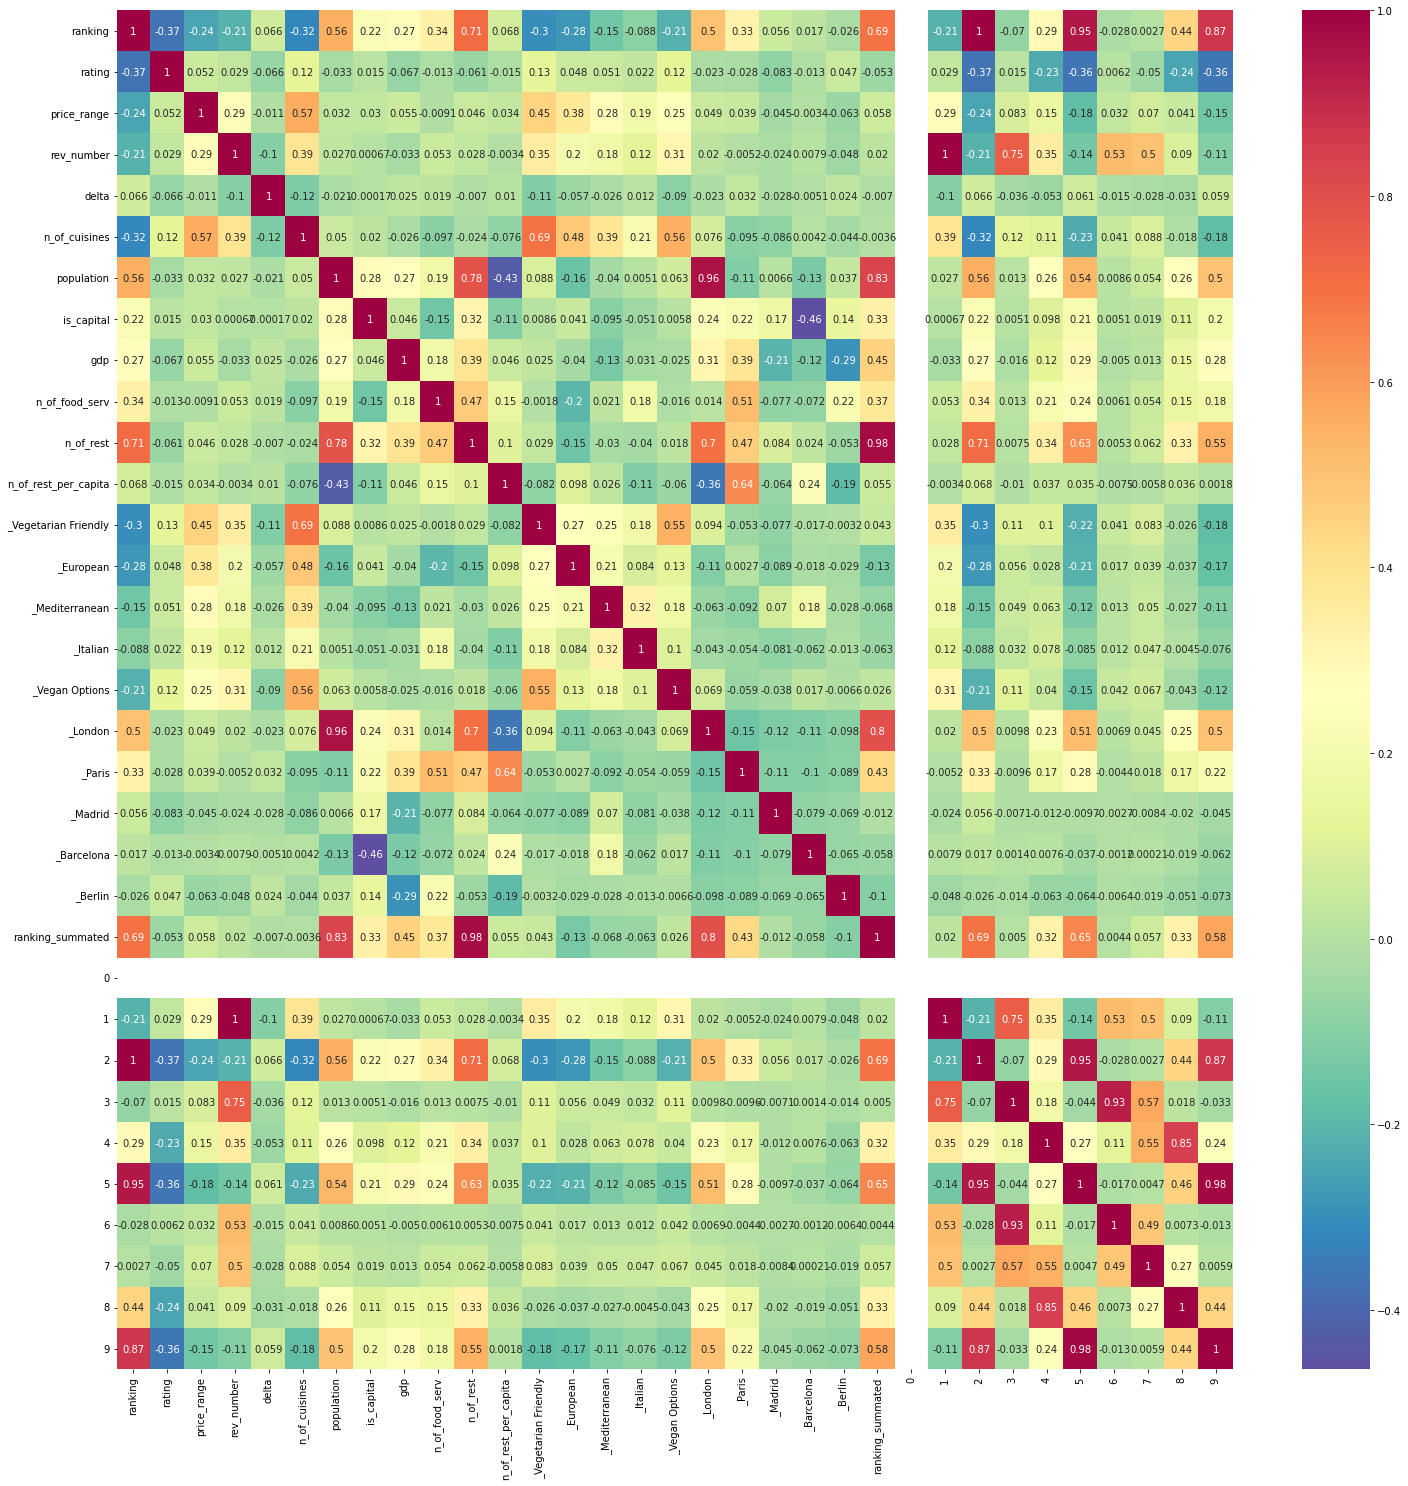

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 25))

sns.heatmap(rest.corr(), annot = True, cmap = 'Spectral_r');

In [ ]:
# rest.loc[:, 'rank/n_of_ids'] = rest.loc[:, 'ranking'] / rest.loc[:, 'n_of_ids']
# rest.drop(columns = ['ranking', 'n_of_ids'], inplace=True)

# rest.loc[:, '4+7'] = rest.loc[:, 4] + rest.loc[:, 7]
# rest.drop(columns = [4, 7], inplace=True)

In [ ]:
# rest.loc[:, 'Vegan'] = rest.loc[:, '_Vegan Options'] + rest.loc[:, '_Vegetarian Friendly']
# rest.drop(columns = ['_Vegan Options', '_Vegetarian Friendly'], inplace=True)

#Данные в модель

,ranking,price_range,rev_number,delta,n_of_cuisines,is_capital,gdp,n_of_food_serv,n_of_rest_per_capita,_Vegetarian Friendly,_European,_Mediterranean,_Italian,_Vegan Options,_Paris,_Madrid,_Barcelona,_Berlin,ranking_summated,4,7
0,5570.0,2,194.0,41,3,1,61883,161466,2.250460,0,1,0,0,0,1,0,0,0,33950960.0,1080580.0,2.096325e+08
1,1537.0,0,10.0,382,1,1,61754,23208,0.495169,0,0,0,0,0,0,0,0,0,1018757.0,15370.0,1.537000e+05
2,353.0,3,688.0,2,7,1,58827,88841,0.531089,1,0,0,0,1,0,0,0,0,47198545.0,242864.0,1.670904e+08
3,3458.0,0,3.0,0,1,1,37601,136091,0.588155,0,0,0,0,0,0,0,0,1,7038741.0,10374.0,3.112200e+04
4,621.0,2,84.0,272,3,0,69844,136091,0.575016,1,0,0,0,0,0,0,0,0,1223892.0,52164.0,4.381776e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,2,79.0,34,4,0,51768,155875,0.678435,1,0,0,1,1,0,0,0,0,6608341.0,39500.0,3.120500e+06
39996,6341.0,2,542.0,9,5,1,61883,161466,2.250460,1,1,0,0,0,1,0,0,0,33950960.0,3436822.0,1.862758e+09
39997,1652.0,0,4.0,3127,2,1,61754,23208,0.495169,0,0,0,0,0,0,0,0,0,1018757.0,6608.0,2.643200e+04
39998,641.0,2,70.0,23,5,1,49722,39291,0.405240,1,1,0,0,0,0,0,0,0,772830.0,44870.0,3.140900e+06


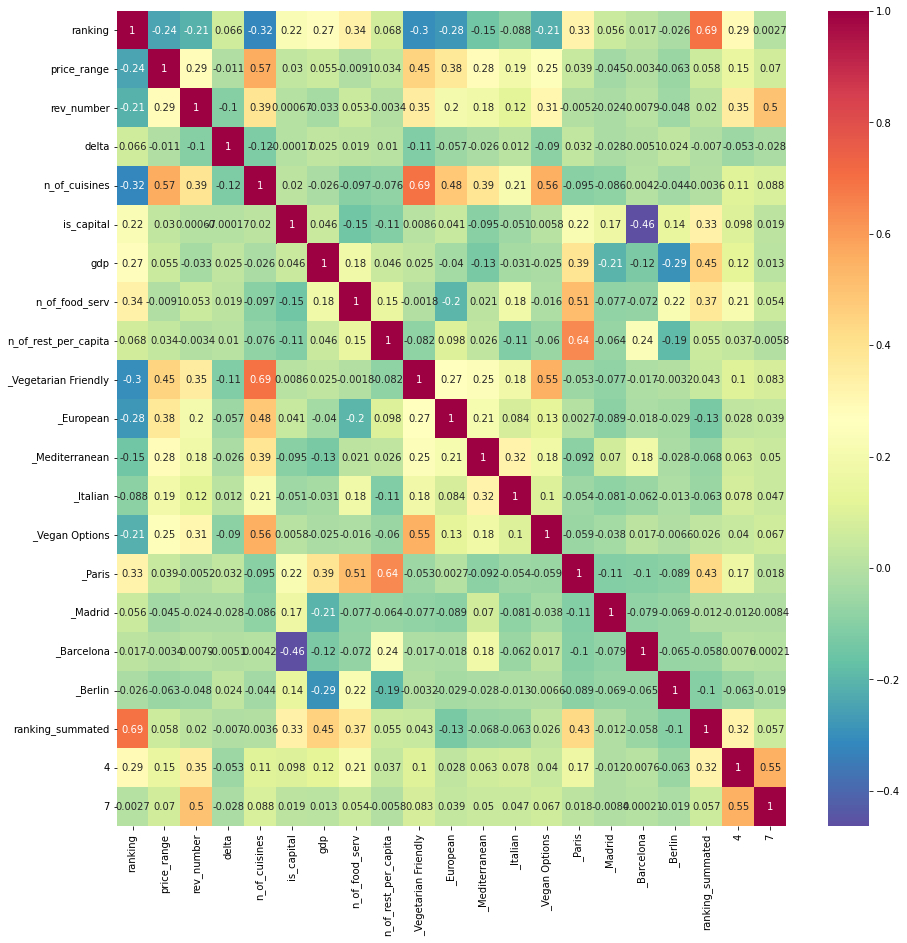

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# rest_m = rest.loc[:, ['ranking', 'rev_number', 'n_of_cuisines', 'delta', 'population']]
rest_m = rest.drop(['id', 'city', 'cuisine', 'rating', 'reviews',
                    'population', 'n_of_rest', '_London',
                    0, 1, 2, 3, 5, 6, 8, 9],
                   axis=1)
plt.figure(figsize = (15, 15))
sns.heatmap(rest_m.corr(), annot = True, cmap = 'Spectral_r');
rest_m

In [ ]:
rest_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ranking               40000 non-null  float64
 1   price_range           40000 non-null  int64  
 2   rev_number            40000 non-null  float64
 3   delta                 40000 non-null  int64  
 4   n_of_cuisines         40000 non-null  int64  
 5   is_capital            40000 non-null  int64  
 6   gdp                   40000 non-null  int64  
 7   n_of_food_serv        40000 non-null  int64  
 8   n_of_rest_per_capita  40000 non-null  float64
 9   _Vegetarian Friendly  40000 non-null  uint8  
 10  _European             40000 non-null  uint8  
 11  _Mediterranean        40000 non-null  uint8  
 12  _Italian              40000 non-null  uint8  
 13  _Vegan Options        40000 non-null  uint8  
 14  _Paris                40000 non-null  uint8  
 15  _Madrid            

# Создаём, обучаем и тестируем модель

1 run MAE: 0.1839375
2 run MAE: 0.1768125
3 run MAE: 0.1795
4 run MAE: 0.18075
5 run MAE: 0.183375

5 runs mean MAE: 0.18087499999999998


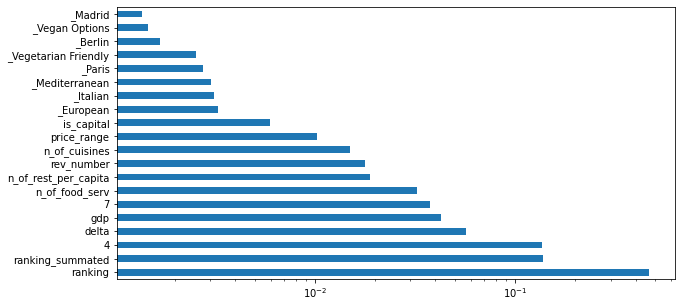

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
# X = rest.drop(['Restaurant_id', 'Rating'], axis = 1)  
X = rest_m
y = rest.loc[:, 'rating']
      
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
    # Для тестирования мы будем использовать 25% от исходного датасета.  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
# Импортируем необходимые библиотеки:  
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели 

n = 5
mae = []
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
     
    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100, verbose=0, n_jobs=1, random_state=RANDOM_SEED)  
      
    # Обучаем модель на тестовом наборе данных  
    regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
    y_pred = regr.predict(X_test)

    y_pred = (y_pred*2).round()/2
 
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
    mae += [metrics.mean_absolute_error(y_test, y_pred)]
    print(f'{i+1} run MAE: {mae[i]}')
print(f'\n{n} runs average MAE: {sum(mae)/len(mae)}')

plt.rcParams['figure.figsize'] = (10, 5)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', log=True);

# 5 runs mean MAE: 0.1856125 - без price_range
# 5 runs mean MAE: 0.18478749999999997 - price_range заполнен с сохранением внутригородского распределения
# 5 runs mean MAE: 0.1867
# 5 runs mean MAE: 0.1820875 - price_range заполнен нулями
# 5 runs mean MAE: 0.1843375 - price_range заполнен нулями, добавлен n_of_rest
# 5 runs mean MAE: 0.1832625 - price_range заполнен нулями,
#                              добавлен n_of_rest_per_capita вместо n_of_rest и population
# 5 runs mean MAE: 0.1825875 - price_range заполнен нулями,
#                              добавлен n_of_rest_per_capita вместо n_of_rest и population,
#                              добавлены dummies-переменные из cuisines
# 5 runs mean MAE: 0.1829